<a href="https://colab.research.google.com/github/marcyhelen/Preparacion/blob/main/Preparacion_de_datos_C_149.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparación de los datos


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd

# Visualización de datos
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")


In [31]:
df = pd.read_excel("/content/drive/MyDrive/MAESTRIA/VENTAS 2019 - 2023.xlsx", parse_dates=['FECHA'])
df.head()

,Cod_vende,nom_vende,cod_clien,nom_clien,cod_zona,nom_zona,cod_ciudad,nom_ciudad,cod_ruta,nom_ruta,...,canti_bonidev,desc_dev,Und,Neto_final,FECHA,C1,C2,C3,categoria,clase_terapeutica
0,38,VENDEDOR LA PAZ,1951,David Rocha Valdez,40,La Paz,5,LA PAZ,87,Ruta Hospitales y Ce,...,0,0.0,200,6750.0,2021-01-15,0.0,6750.0,0.0,J01F,J01F MACROLIDOS Y SIMILARES
1,42,VENDEDOR CAD SC,246,FarmaCorp S.A.,83,Farmacorp,1,SANTA CRUZ,67,Ruta Cadenas CBBA,...,0,0.0,184,6210.0,2021-02-02,0.0,6210.0,0.0,J01F,J01F MACROLIDOS Y SIMILARES
2,38,VENDEDOR LA PAZ,1951,David Rocha Valdez,40,La Paz,5,LA PAZ,87,Ruta Hospitales y Ce,...,0,0.0,100,3375.0,2021-01-18,0.0,3375.0,0.0,J01F,J01F MACROLIDOS Y SIMILARES
3,42,VENDEDOR CAD SC,246,FarmaCorp S.A.,83,Farmacorp,1,SANTA CRUZ,67,Ruta Cadenas CBBA,...,0,0.0,100,3375.0,2022-01-10,0.0,3375.0,0.0,J01F,J01F MACROLIDOS Y SIMILARES
4,42,VENDEDOR CAD SC,246,FarmaCorp S.A.,83,Farmacorp,1,SANTA CRUZ,67,Ruta Cadenas CBBA,...,0,0.0,84,4095.0,2023-06-09,0.0,4095.0,0.0,J01F,J01F MACROLIDOS Y SIMILARES


In [32]:
df = df[df['Codigo'] == 149].loc[:, ['FECHA', 'Und']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4408 entries, 49017 to 53424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   4408 non-null   datetime64[ns]
 1   Und     4408 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 103.3 KB


In [33]:
df.head()

,FECHA,Und
49017,2021-12-13,360
49018,2023-04-17,281
49019,2021-08-19,240
49020,2023-12-12,161
49021,2023-05-17,150


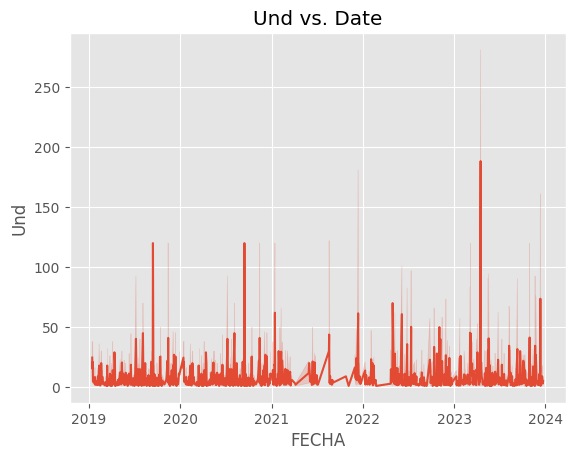

In [34]:
import seaborn as sns
sns.lineplot(data=df, x="FECHA", y="Und")


# Set the title and show the plot
plt.title("Und vs. Date")
plt.show()


In [35]:
import pandas as pd
df1 = df.groupby('FECHA')['Und'].sum().reset_index()
df2 = df1.groupby(pd.Grouper(key='FECHA', freq='M'))['Und'].sum().reset_index()
df3 = df1.groupby(pd.Grouper(key='FECHA', freq='Y'))['Und'].sum().reset_index()

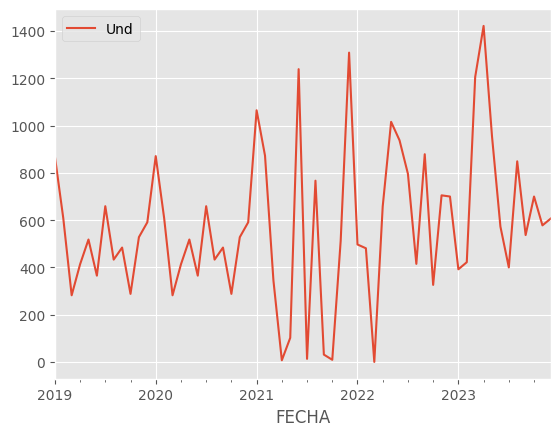

In [36]:
import matplotlib.pyplot as plt
df2.plot(x='FECHA', y='Und')
plt.show()

In [37]:
df2 = df2.set_index('FECHA')
df2.head()

,Und
FECHA,
2019-01-31,871
2019-02-28,609
2019-03-31,282
2019-04-30,413
2019-05-31,518


In [38]:
#Asignamos una frecuencia mensual
df2.index.freq= 'M'

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-31 to 2023-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Und     60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [40]:
fig = px.line(df2, x=df2.index, y="Und",template = "plotly_dark",
              title="Unidades vendidas")
fig.show()

No existe una tendencia

count      60.000000
mean      573.433333
std       318.855760
min         0.000000
25%       398.000000
50%       528.000000
75%       720.500000
max      1422.000000
Name: Und, dtype: float64

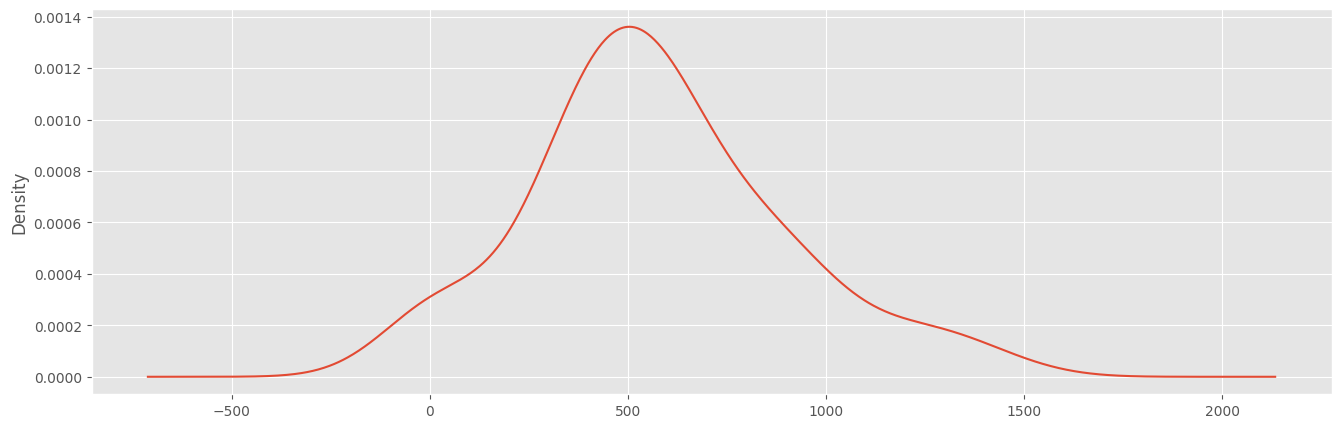

In [41]:
# El gráfico de densidad otra gráfica de exploración
df2['Und'].plot(kind='kde', figsize=(16,5))
df2['Und'].describe()

In [42]:
datos = df2.copy()

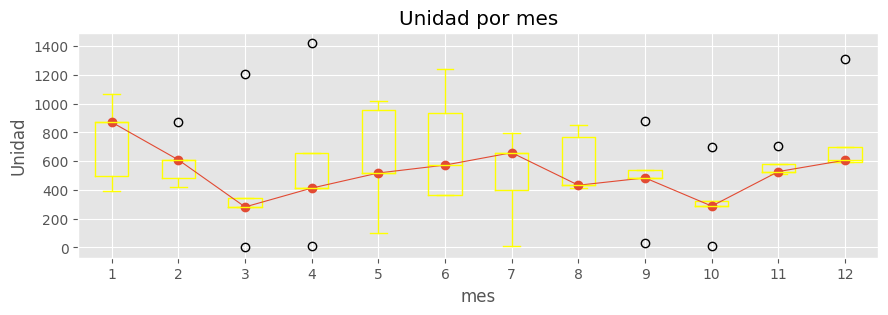

In [43]:
# Gráfico bloxplot para estacionalidad anual

fig, ax= plt.subplots(figsize=(10,3))
datos['mes'] = datos.index.month
datos.boxplot(column='Und', by='mes', ax=ax, color="yellow")
datos.groupby('mes')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Unidad')
ax.set_title('Unidad por mes')
fig.suptitle('');

### CALCULAR LOS OUTLIERS

In [44]:
Q1 = datos['Und'].quantile(0.25)
print("Primer cuartil", Q1)

Q3 = datos['Und'].quantile(0.75)
print("Tercer cuartil", Q3)

IQR= Q3-Q1

Mediana= datos['Und'].median()
print("Mediana", Mediana)

Valor_minimo = datos['Und'].min()
print("Valor minimo: ", Valor_minimo )

Valor_maximo = datos['Und'].max()
print("Valor maximo: ", Valor_maximo)

Primer cuartil 398.0
Tercer cuartil 720.5
Mediana 528.0
Valor minimo:  0
Valor maximo:  1422


In [45]:
BI_Calculado = (Q1-1.5 *IQR)
print("BI_Calculado", BI_Calculado)

BS_Calculado = (Q3+1.5 *IQR)
print("BS_Calculado", BS_Calculado)

BI_Calculado -85.75
BS_Calculado 1204.25


In [46]:
ubicacion_outliers = (datos['Und'] < BI_Calculado) | (datos['Und'] > BS_Calculado)
print("Ubicacion de los outliers", ubicacion_outliers)

Ubicacion de los outliers FECHA
2019-01-31    False
2019-02-28    False
2019-03-31    False
2019-04-30    False
2019-05-31    False
2019-06-30    False
2019-07-31    False
2019-08-31    False
2019-09-30    False
2019-10-31    False
2019-11-30    False
2019-12-31    False
2020-01-31    False
2020-02-29    False
2020-03-31    False
2020-04-30    False
2020-05-31    False
2020-06-30    False
2020-07-31    False
2020-08-31    False
2020-09-30    False
2020-10-31    False
2020-11-30    False
2020-12-31    False
2021-01-31    False
2021-02-28    False
2021-03-31    False
2021-04-30    False
2021-05-31    False
2021-06-30     True
2021-07-31    False
2021-08-31    False
2021-09-30    False
2021-10-31    False
2021-11-30    False
2021-12-31     True
2022-01-31    False
2022-02-28    False
2022-03-31    False
2022-04-30    False
2022-05-31    False
2022-06-30    False
2022-07-31    False
2022-08-31    False
2022-09-30    False
2022-10-31    False
2022-11-30    False
2022-12-31    False
2023-01-

In [47]:
outliers = datos[ubicacion_outliers]
print("Lista de outliers; ",outliers)

Lista de outliers;               Und  mes
FECHA                
2021-06-30  1239    6
2021-12-31  1309   12
2023-03-31  1206    3
2023-04-30  1422    4


In [48]:
ubicacion_sin_out = (datos['Und'] >= BI_Calculado) & (datos['Und']<= BS_Calculado )
sin_outliers=datos[ubicacion_sin_out]

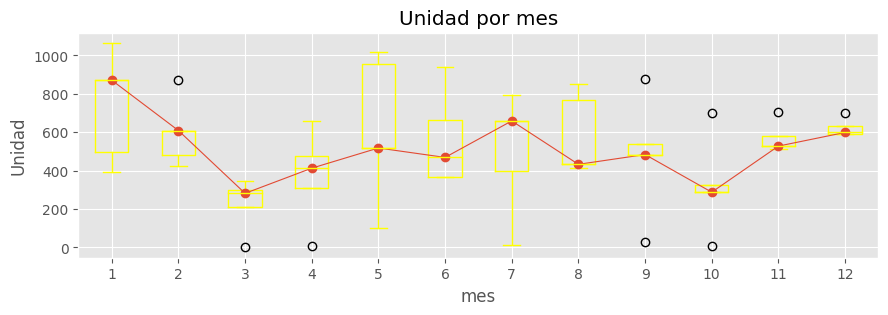

In [49]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(10,3))
sin_outliers['mes'] = sin_outliers.index.month
sin_outliers.boxplot(column='Und', by='mes', ax=ax, color="yellow")
sin_outliers.groupby('mes')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Unidad')
ax.set_title('Unidad por mes')
fig.suptitle('');

## 3.4 La prueba de Dickey-Fuller aumentada
Una prueba de Dickey-Fuller aumentada (ADF) es un tipo de prueba estadística que determina si una raíz unitaria está presente en los datos de series de tiempo. Las raíces unitarias pueden causar resultados impredecibles en el análisis de series de tiempo. Se forma una hipótesis nula en la prueba de raíz unitaria para determinar qué tan fuertemente los datos de series temporales se ven afectados por una tendencia. Al aceptar la hipótesis nula, aceptamos la evidencia de que los datos de la serie temporal no son estacionarios. Al rechazar la hipótesis nula o aceptar la hipótesis alternativa, aceptamos la evidencia de que los datos de la serie de tiempo son generados por un proceso estacionario. Este proceso también se conoce como tendencia estacionaria. Los valores de la estadística de prueba ADF son negativos. Los valores más bajos de ADF indican un rechazo más fuerte de la hipótesis nula.

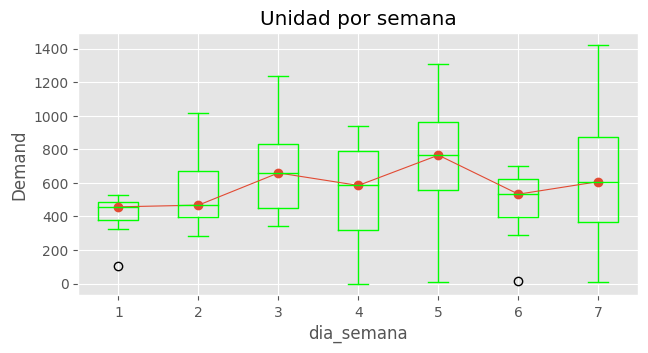

In [50]:
# Gráfico bloxplot para estacionalidad semanal

fig, ax= plt.subplots(figsize=(7,3.5))
datos['dia_semana'] = datos.index.day_of_week + 1
datos.boxplot(column='Und', by='dia_semana', ax=ax, color="lime")
datos.groupby('dia_semana')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Unidad por semana')
fig.suptitle('');

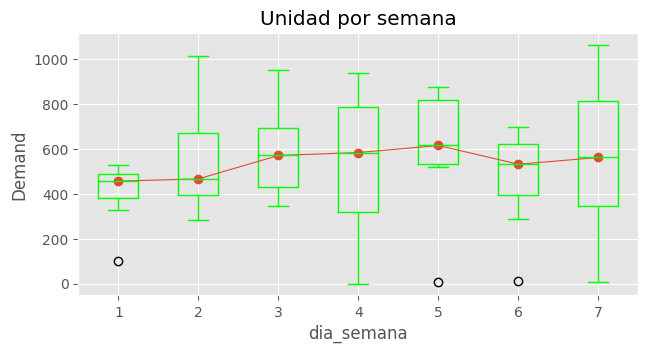

In [51]:
fig, ax= plt.subplots(figsize=(7,3.5))
sin_outliers['dia_semana'] = sin_outliers.index.day_of_week + 1
sin_outliers.boxplot(column='Und', by='dia_semana', ax=ax, color="lime")
sin_outliers.groupby('dia_semana')["Und"].median().plot(style='o-', linewidth=0.8,ax=ax)
ax.set_ylabel('Demand')
ax.set_title('Unidad por semana')
fig.suptitle('');

In [52]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [53]:
Prueba_Dickey_Fuller(sin_outliers["Und"],"Und")

Resultados de la prueba de Dickey-Fuller para columna: Und
Test Statistic                       -5.802051e+00
p-value                               4.606676e-07
No Lags Used                          0.000000e+00
Número de observaciones utilizadas    5.500000e+01
Critical Value (1%)                  -3.555273e+00
Critical Value (5%)                  -2.915731e+00
Critical Value (10%)                 -2.595670e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


<Figure size 700x300 with 0 Axes>

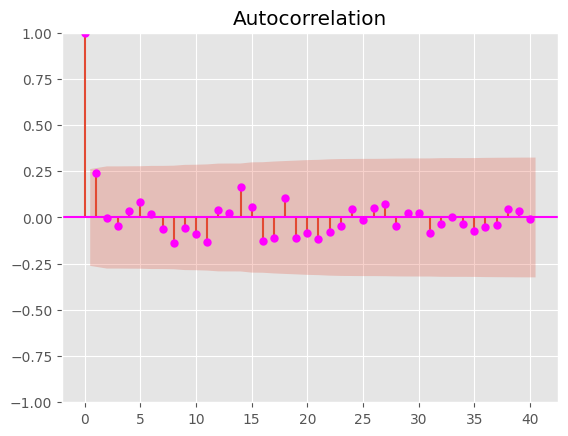

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
plot_acf(sin_outliers['Und'],lags=40, color='fuchsia')
plt.show()

In [55]:
datos.to_csv('preparacion_149.csv')

In [56]:
from google.colab import files
files.download('preparacion_149.csv')
##subir a github

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>